# Task 2: Visualizing fire scars through false color
#### Author: Sofia Rodas

- Homework 4 GitHub repository: https://github.com/sofiiir/eds220-hwk4.git

## Fire Perimeter Data Import and Preparation

In [1]:
# Import packages
import os 
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr


os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'


# ------ IMPORT DATASETS ------

fp = os.path.join('data', 'eaton_fire_perimeter', 'Eaton_Perimeter_20250121.shp')
eaton_fire = gpd.read_file(fp)

fp = os.path.join('data', 'palisades_fire_perimeter', 'Palisades_Perimeter_20250121.shp')
palisades_fire = gpd.read_file(fp)

## Fire perimeter data exploration

The data perimeter was acquired from the county of Los Angeles official GIS catalogue. Los Angeles County is originally from the National Interagency Fire Center (NIFC) through the Fire Integrated Real-time Intelligence System (FIRIS).

In [2]:
# Check the CRS for Eaton fire perimeter
print(f'The Eaton Canyon Fire Perimeter is in {eaton_fire.crs.name}')

The Eaton Canyon Fire Perimeter is in WGS_1984_Web_Mercator_Auxiliary_Sphere


In [3]:
# Check for projected or geographic
print(f"Is the Eaton Canyon Fire Perimeter CRS geographic? {eaton_fire.crs.is_geographic}")
print(f"Is the Eaton Canyon Fire Perimater CRS projected? {eaton_fire.crs.is_projected}")

Is the Eaton Canyon Fire Perimeter CRS geographic? False
Is the Eaton Canyon Fire Perimater CRS projected? True


In [4]:
# Look at the column names and data types of the Eaton Fire shapefile
eaton_fire.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes


In [5]:
# Check the CRS for Palisades fire perimeter
print(f'The Palisades Fire Perimeter is in {palisades_fire.crs.name}')

The Palisades Fire Perimeter is in WGS_1984_Web_Mercator_Auxiliary_Sphere


In [6]:
# Check for projected or geographic
print(f"Is the Palisades Fire Perimeter CRS geographic? {palisades_fire.crs.is_geographic}")
print(f"Is the Palisades Fire Perimater CRS projected? {palisades_fire.crs.is_projected}")

Is the Palisades Fire Perimeter CRS geographic? False
Is the Palisades Fire Perimater CRS projected? True


In [7]:
# Look at the column names and data types of the Palisades Fire shapefile
palisades_fire.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes


#### Eaton Canyon fire perimeter
The Eaton Canyon fire perimeter is projected in the WGS 1984 Web Mercator CRS. 

#### Palisades fire perimeter
The Palisade fire perimeter is projected in the WGS 1984 Web Mercator CRS.

## NetCDF Data Import and Preparation

In [8]:
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

# Import the NetCDF data
fp = os.path.join('data', 'landsat8-2025-02-23-palisades-eaton.nc')
landsat = xr.open_dataset(fp)

In [9]:
# Look at the variables, dimensions, and coordinates
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

In [10]:
# Look at the CRS for the x coordinates
landsat.x.crs

'EPSG:32611'

In [11]:
# Look at the CRS for the y coordinates
landsat.y.crs

'EPSG:32611'

## Restoring Geospatial Information

In [12]:
# Print the CRS of the dataset 
print(f"What is the Landsat data's CRS? {landsat.rio.crs}")

What is the Landsat data's CRS? None


The landsat data does have a CRS but it is stored in `spatial_ref`. 

In [13]:
# Save the CRS of the `spatial_ref` 
landsat_crs = landsat.spatial_ref.crs_wkt

In [14]:
landsat.rio.write_crs(landsat_crs, inplace = True)

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...

In [15]:
# Print the CRS of the dataset 
print(f"What is the Landsat data's CRS? {landsat.rio.crs}")

What is the Landsat data's CRS? PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


ERROR 1: PROJ: proj_identify: /opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


## True color image

Clouds RGB values are outliers. The other values are not appearing when plotting below as the color scale is distorted. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


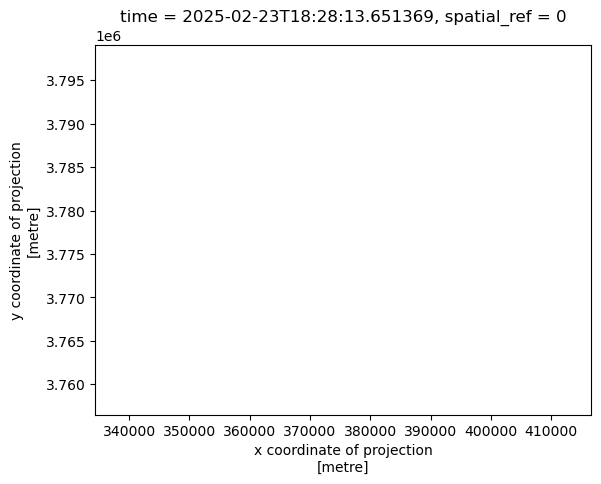

In [16]:
# Create an RGB image with the data
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

Adding the argument `robust = True` to remove the outliers from the plot. This uses the 2nd and 98th percentiles of the data to calculate the color limits according to the xarray documentation. 

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


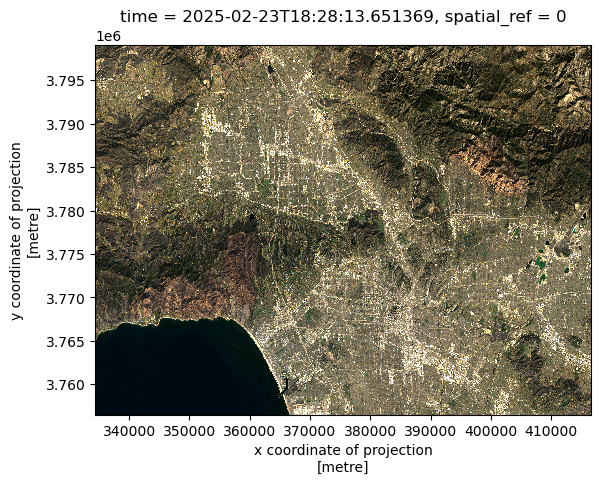

In [17]:
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

The warning above is indicating that `nan` values are present in the data. Identify which bands have `nan` values. 

In [18]:
landsat[['red', 'green', 'blue']].to_array().isnull().sum()

<xarray.DataArray ()> Size: 8B
array(110)
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0

The `nan` values are in array 110. Substitute the `nan` values with zero.

In [23]:
landsat_clean = landsat[['red', 'green', 'blue']].to_array().fillna(value = 0)

Map the true color image without warnings. 

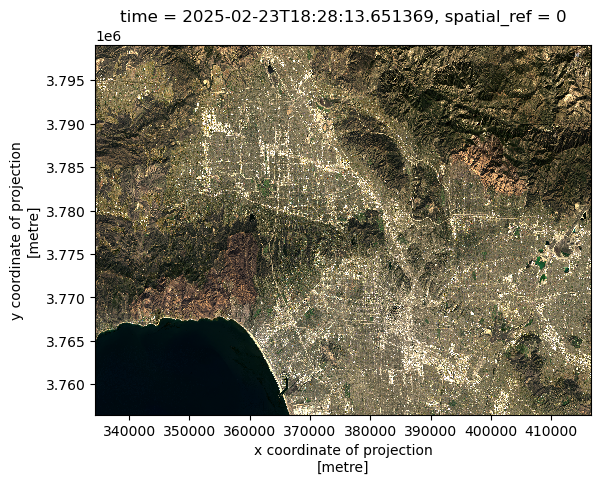

In [26]:
landsat_clean.plot.imshow(robust = True)

#### Plot difference explanation
The initial plot `landsat[['red', 'green', 'blue']].to_array().plot.imshow()` shows a white plot since there is a 

## False color image

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).